In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import random
import warnings
warnings.filterwarnings('ignore')

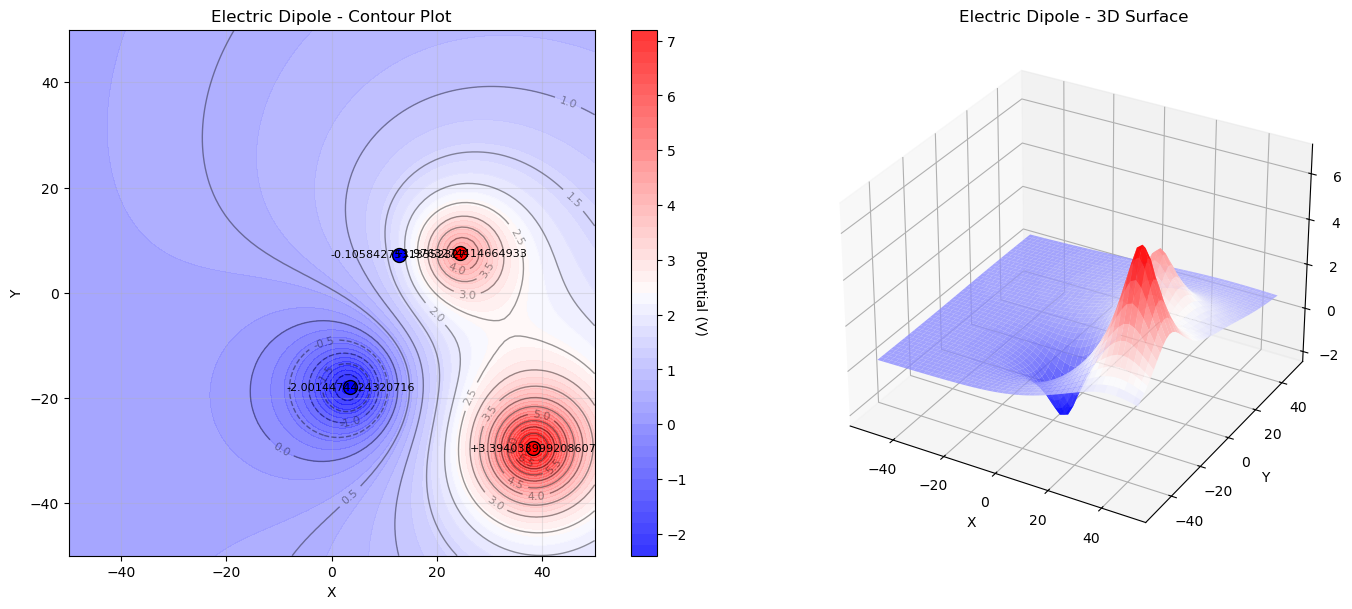

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import random
import warnings
warnings.filterwarnings('ignore')

k = 8.99e9  # Coulomb constant (can be set to 1 for normalized units)
k = 3  # Using normalized units for simplicity

x_div = 100
y_div = 100

def calc_V_field(charges, positions):
    '''
    Parameters:
    charges: array of charge values
    positions: array of charge positions, each of format [x,y]
    divisions: divisions on each axis

    Outputs:
    X, Y: np arrays containing x, y coordinates
    V: potential value at each grid point
    '''

    global x_div, y_div

    # Create meshgrid
    x = np.linspace(-x_div/2, x_div/2, x_div)
    y = np.linspace(-y_div/2, y_div/2, y_div)
    X_meshgrid, Y_meshgrid = np.meshgrid(x, y)

    # Initialize potential field
    V = np.zeros_like(X_meshgrid)

    # Calculate potential from each charge
    charges = np.array(charges)
    positions = np.array(positions)

    for i, (charge, pos) in enumerate(zip(charges, positions)):
        r = np.sqrt((X_meshgrid - pos[0])**2 + (Y_meshgrid - pos[1])**2)  #distance from charge to each grid point
        r = np.where(r == 0, 1e-10, r) #avoid division by zero
        V += k * charge / np.sqrt(r**2 / 20 + 2) #add V contribution from charge i #+2 is to softening term

    return X_meshgrid, Y_meshgrid, V

def charges_positions_from_array(charge_distribution):
    non_zero_indices = np.argwhere(charge_distribution != 0)

    charges = charge_distribution[non_zero_indices[:, 0], non_zero_indices[:, 1]]

    pos_x = X_meshgrid[non_zero_indices[:, 0], non_zero_indices[:, 1]]
    pos_y = Y_meshgrid[non_zero_indices[:, 0], non_zero_indices[:, 1]]

    # Combine (x, y) coordinates into an (N, 2) array of positions
    positions = np.stack((pos_x, pos_y), axis=1)
    return charges, positions

#define visualisation function
def visualise_potential_field(X, Y, V, charges, positions, title="Electric Potential Field"):
    '''
    Parameters: 
    charges, positions (same as before) 
    [outputs from calc_V_field function]
    title

    Outputs:
    none
    '''

    fig = plt.figure(figsize=(15, 6))

    # Clip extreme values for better visualization
    V_clipped = np.clip(V, -15, 15)

    # Create custom colormap
    colors = ['blue', 'white', 'red']
    n_bins = 100
    cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

    ######

    if len(charges) < 0.1 * x_div * y_div:
        #---contour plot---
        ax1 = fig.add_subplot(121)
        contour = ax1.contour(X, Y, V_clipped, levels=20, colors='black', alpha=0.4, linewidths=1)
        ax1.clabel(contour, inline=True, fontsize=8, fmt='%.1f')
        contourf = ax1.contourf(X, Y, V_clipped, levels=50, cmap=cmap, alpha=0.8)

        #coulorbar
        cbar1 = plt.colorbar(contourf, ax=ax1)
        cbar1.set_label('Potential (V)', rotation=270, labelpad=15)

        charges = np.array(charges)
        positions = np.array(positions)

        for charge, pos in zip(charges, positions):
            if charge > 0:
                ax1.plot(pos[0], pos[1], 'ro', markersize=10, markeredgecolor='black')
                ax1.text(pos[0], pos[1], f'+{charge}', ha='center', va='center', fontsize=8)
            else:
                ax1.plot(pos[0], pos[1], 'bo', markersize=10, markeredgecolor='black')
                ax1.text(pos[0], pos[1], f'{charge}', ha='center', va='center', fontsize=8)

        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        ax1.set_title(f'{title} - Contour Plot')
        ax1.grid(True, alpha=0.3)
        ax1.set_aspect('equal')

    else:
        #---plot charges as 3D srf---

        C = np.zeros_like(V)
        for i in range(len(charges)):
            C[int(positions[int(i)][0]), int(positions[int(i)][1])] = charges[i]
        C_clipped = np.clip(C, -15, 15)

        ax1 = fig.add_subplot(121, projection='3d')

        # Create a less dense mesh for 3D plot
        #step = max(1, len(X) // 50)
        #X_sparse = X[::step, ::step]
        #Y_sparse = Y[::step, ::step]

        surf = ax1.plot_surface(X_meshgrid, Y_meshgrid, C_clipped, cmap=cmap, alpha=0.8,
                               linewidth=0, antialiased=True)

        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        ax1.set_zlabel('Charge (C)')
        ax1.set_title(f'Charge distribution - 3D Surface')

        plt.tight_layout()


    # 3D surface plot
    from mpl_toolkits.mplot3d import Axes3D
    ax2 = fig.add_subplot(122, projection='3d')

    # Create a less dense mesh for 3D plot
    step = max(1, len(X) // 50)
    X_sparse = X[::step, ::step]
    Y_sparse = Y[::step, ::step]
    V_sparse = V_clipped[::step, ::step]

    surf = ax2.plot_surface(X_sparse, Y_sparse, V_sparse, cmap=cmap, alpha=0.8,
                           linewidth=0, antialiased=True)

    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Potential (V)')
    ax2.set_title(f'{title} - 3D Surface')

    plt.tight_layout()
    plt.show()

num_charges = 5
max_charge = 5

def main():
    # Example 1: Dipole
    charges = []
    positions = []

    #randomly generate charge distribution
    for _ in range(random.randint(1,num_charges)):
        charges.append((random.random() -0.5) * 2 * max_charge)
        positions.append( [(random.random() -0.5) * x_div, (random.random() -0.5) * y_div])

    X, Y, V = calc_V_field(charges, positions)
    visualise_potential_field(X, Y, V, charges, positions, title="Electric Dipole")

if __name__ == "__main__":
    main()


In [41]:
'''GENERATE DATA'''
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.ndimage import gaussian_filter

#---X, Y generation function---
num_charges = 7
max_charge = 5
x_div = 100
y_div = 100

def generate_data(num_charges=7, max_charge=50, x_div=100, y_div=100):
    charges = []
    positions = []
    Charges = np.zeros((x_div, y_div))

    #randomly generate charge distribution
    for _ in range(random.randint(1,num_charges)):
        charge = (random.random() -0.5) * 2 * max_charge
        position = [round((random.random() -0.5) * x_div), round((random.random() -0.5) * y_div)]
        charges.append(charge)
        positions.append(position)
        Charges[position[0], position[1]] = charge

    sigma =3.5
    Charges = gaussian_filter(Charges, sigma=sigma)

    #calculate V field
    X_meshgrid, Y_meshgrid , V = calc_V_field(charges, positions)
    #visualise_potential_field(X, Y, V, charges, positions, title="Electric Dipole")
    return X_meshgrid, Y_meshgrid, V, Charges



#---generate and prepare X, Y data---
repeats = 2000
X = []
Y = []

for _ in tqdm(range(repeats), desc="Generating data"):
    X_meshgrid, Y_meshgrid, V, C = generate_data()
    X.append(C)
    Y.append(V)

#format
X = np.array(X)
Y = np.array(Y)
X = np.expand_dims(X, axis=-1)  # (8000, 100, 100, 1)
Y = np.expand_dims(Y, axis=-1)  # (8000, 100, 100, 1)

#split into train/test sets
C_train, C_val, V_train, V_val = train_test_split(X, Y, test_size=0.2, random_state=63)
print("X_train, Y_train, X_val, Y_val created")


Generating data:   0%|          | 0/2000 [00:00<?, ?it/s]

X_train, Y_train, X_val, Y_val created


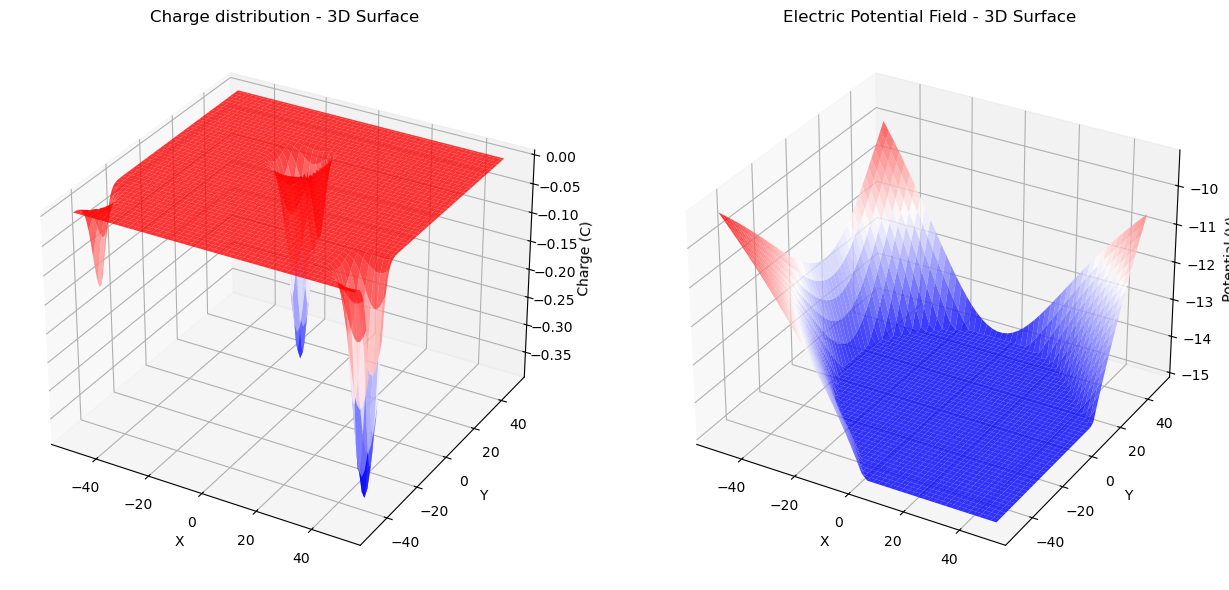

In [36]:
X_meshgrid, Y_meshgrid, V, Charges = generate_data()
charges, positions = charges_positions_from_array(Charges)
visualise_potential_field(X_meshgrid, Y_meshgrid, V, charges, positions, title="Electric Potential Field")

In [38]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Visualize Keras training history (loss and metrics).

    Parameters:
    -----------
    history : keras.callbacks.History
        The History object returned by model.fit().
    """

    # Extract the history dictionary
    hist = history.history

    # Find all metrics (loss and others)
    metrics = [m for m in hist.keys() if not m.startswith('val_')]

    plt.figure(figsize=(12, 4 * len(metrics)))

    for i, metric in enumerate(metrics, 1):
        plt.subplot(len(metrics), 1, i)

        plt.plot(hist[metric], label=f'Training {metric}', color='blue')
        if f'val_{metric}' in hist:
            plt.plot(hist[f'val_{metric}'], label=f'Validation {metric}', color='orange')

        plt.xlabel('Epochs')
        plt.ylabel(metric)
        plt.title(f'Model {metric} during training')
        plt.legend()
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [42]:
'''TRAIN MODEL'''
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model


#---architecture---
#filters: increase with depth -- detect simple features early on, then combine to detect more complex patterns
#potentially increase strides to reduce computational load

inputs = keras.layers.Input(shape=(x_div, y_div, 1), name='charge_distribution')

conv1 = keras.layers.Conv2D(64, 3, padding='same', activation='relu')(inputs)
conv1 = keras.layers.Conv2D(64, 3, padding='same', activation='relu')(conv1)

conv2 = keras.layers.Conv2D(128, 5, padding='same', activation='relu')(conv1)
conv2 = keras.layers.Conv2D(128, 5, padding='same', activation='relu')(conv2)

conv3 = keras.layers.Conv2D(256, 7, padding='same', activation='relu')(conv2)
conv3 = keras.layers.Conv2D(256, 7, padding='same', activation='relu')(conv3)

dilated1 = keras.layers.Conv2D(128, 3, padding='same', dilation_rate=2, activation='relu')(conv3)
dilated2 = keras.layers.Conv2D(128, 3, padding='same', dilation_rate=4, activation='relu')(dilated1)
dilated3 = keras.layers.Conv2D(128, 3, padding='same', dilation_rate=8, activation='relu')(dilated2)

concat = keras.layers.concatenate([conv1, conv2, conv3, dilated3])
potential = keras.layers.Conv2D(1, 1, padding='same', name='potential')(concat)

model = keras.Model(inputs=inputs, outputs=potential)


#---compile---
learning_rate = 0.0007
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

model.summary()

#---fit---
lr_schedule = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    V_train, C_train,
    validation_data=(V_val, C_val),
    epochs=20,
    batch_size=8,
    callbacks=[early_stop, lr_schedule]
)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ charge_distribution │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 100, 100,  │        640 │ charge_distribut… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 100, 100,  │     36,928 │ conv2d_18[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 100, 100,  │    204,928 │ conv2d_19[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 100, 100,  │    409,728 │ conv2d_20[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 100, 100,  │  1,605,888 │ conv2d_21[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 100, 100,  │  3,211,520 │ conv2d_22[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 100, 100,  │    295,040 │ conv2d_23[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 100, 100,  │    147,584 │ conv2d_24[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 100, 100,  │    147,584 │ conv2d_25[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 100, 100,  │          0 │ conv2d_19[0][0],  │
│ (Concatenate)       │ 576)              │            │ conv2d_21[0][0],  │
│                     │                   │            │ conv2d_23[0][0],  │
│                     │                   │            │ conv2d_26[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ potential (Conv2D)  │ (None, 100, 100,  │        577 │ concatenate_2[0]… │
│                     │ 1)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,060,417 (23.12 MB)

 Trainable params: 6,060,417 (23.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
149/200 ━━━━━━━━━━━━━━━━━━━━ 22s 450ms/step - loss: 176.2278 - mae: 2.3079

KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


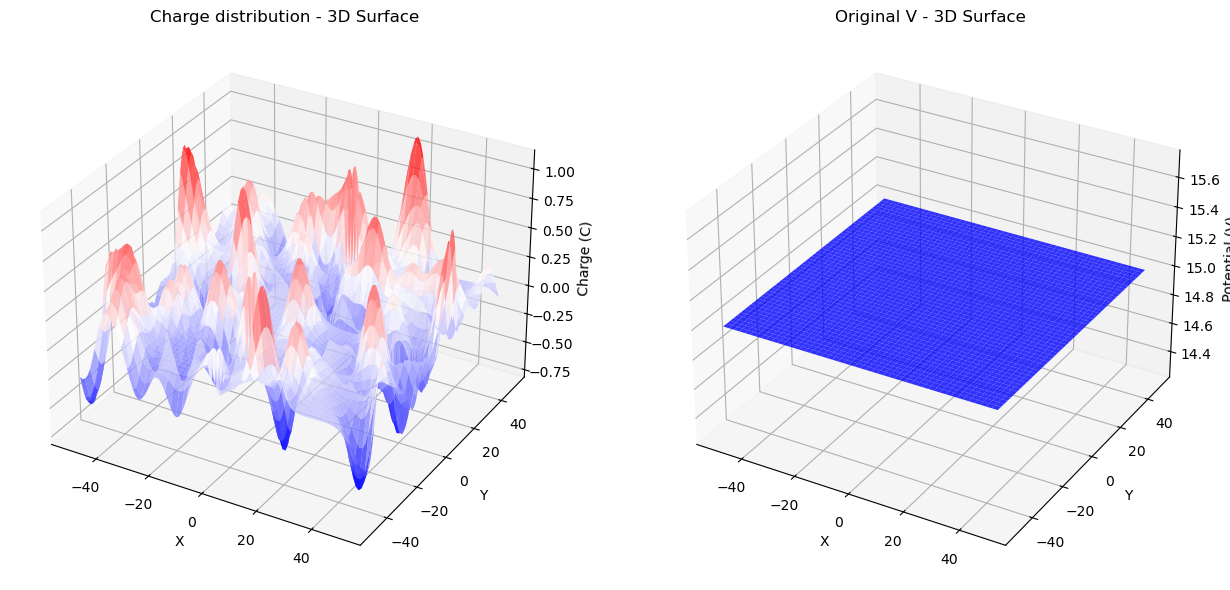

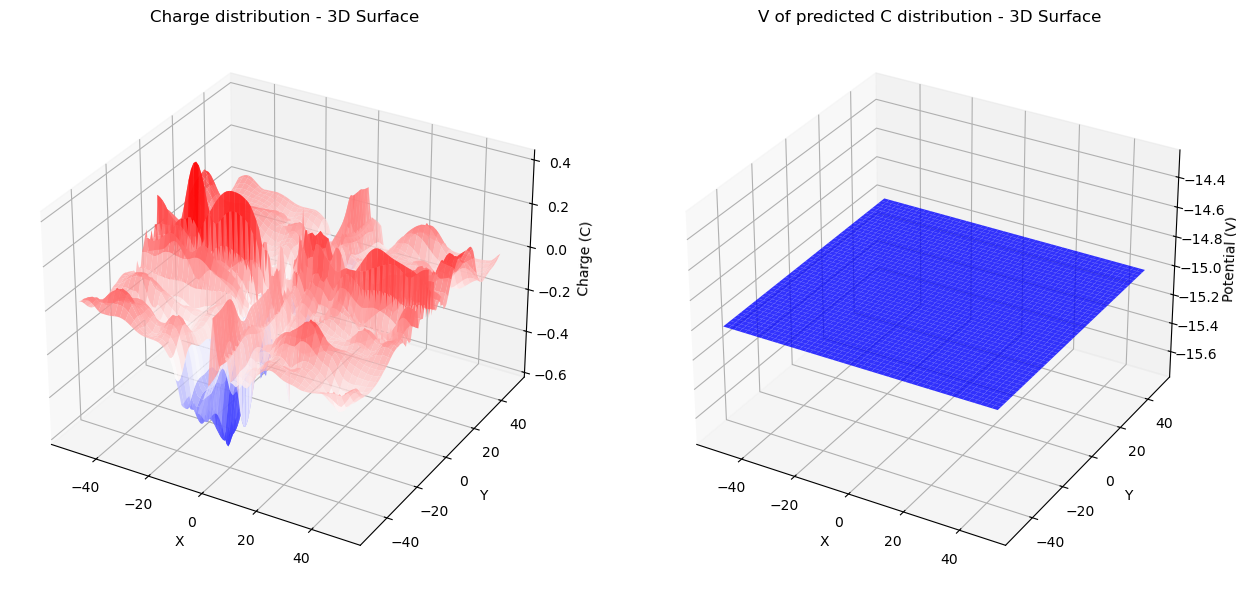

In [46]:
'''TEST MODEL'''

x_div = 100
y_div = 100

'''
charges = []
positions = []
Charges = np.zeros((divisions, divisions))
for _ in range(random.randint(1,num_charges)):
    charge = (random.random() -0.5) * 2 * max_charge
    position = [random.randint(0,xlim), random.randint(0,ylim)]
    charges.append(charge)
    positions.append(position) #rounds to nearest increment
    Charges[position[0], position[1]] = charge
'''

#calculate actual V
X_meshgrid, Y_meshgrid, V, C = generate_data(150)
orig_charges, orig_positions = charges_positions_from_array(C)
V_temp = V.reshape(-1, 100, 100, 1)

#predict V
C_pred = model.predict(V_temp)
C_pred = C_pred[0, ..., 0]
charges, positions = charges_positions_from_array(C_pred)
_, _, V_pred = calc_V_field(charges, positions)

#visualise
visualise_potential_field(X_meshgrid, Y_meshgrid, V, orig_charges, orig_positions, title='Original V')
visualise_potential_field(X_meshgrid, Y_meshgrid, V_pred, charges, positions, title='V of predicted C distribution')
#visualise_potential_field(X_meshgrid, Y_meshgrid, C_pred, charges, positions, title='V of predicted C distribution')


In [7]:
model.save("C_pred_2.keras")

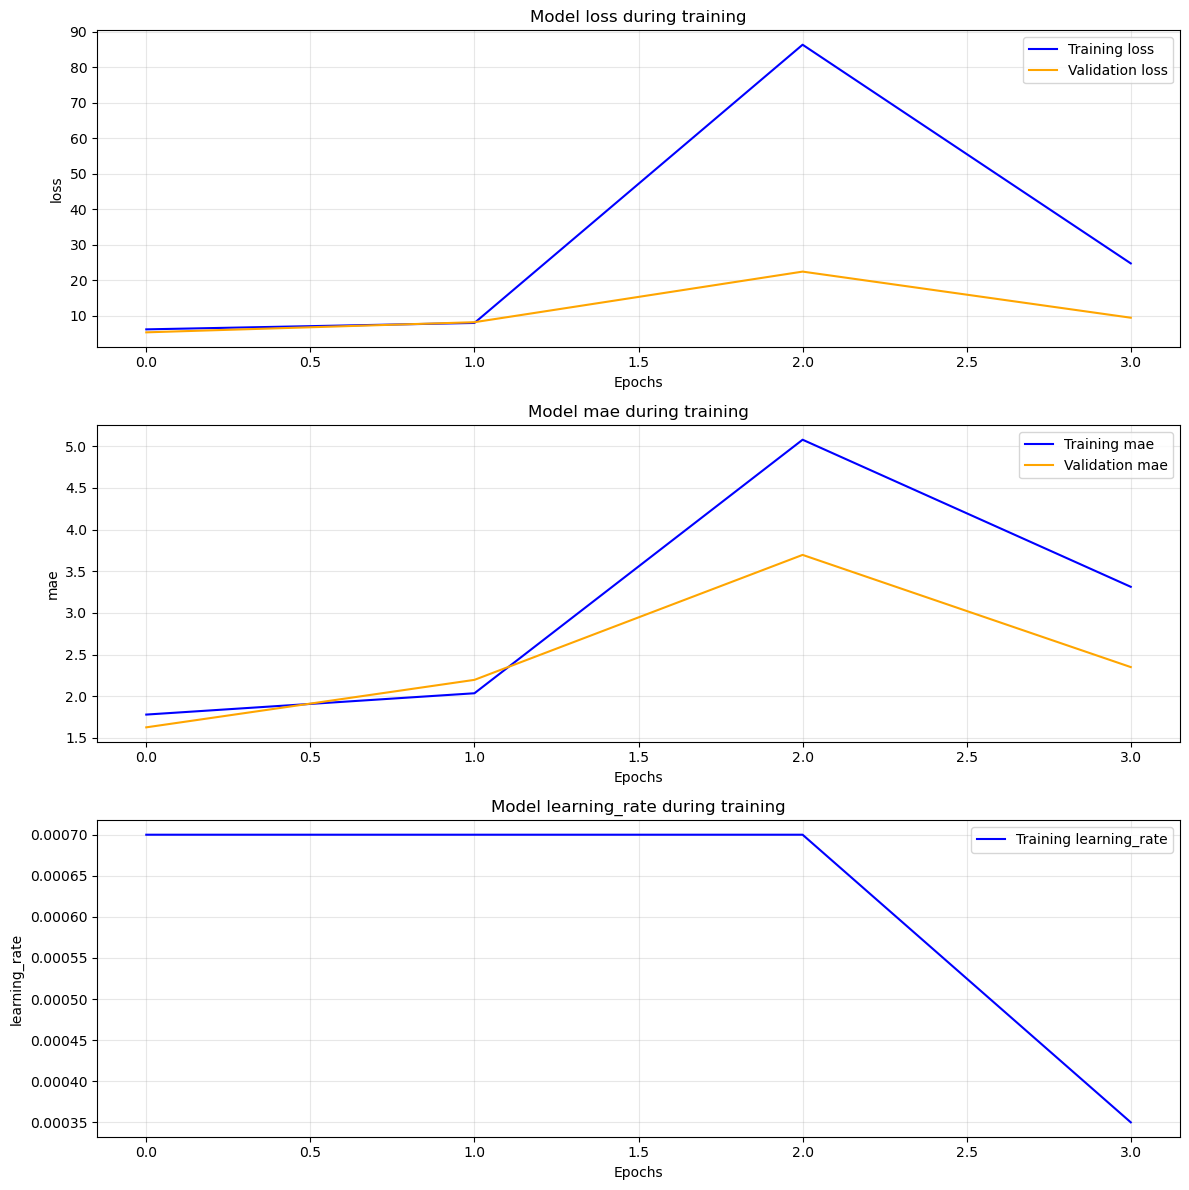

In [153]:
plot_training_history(history)